In [1]:
import pandas as pd
import numpy as np

In [2]:
file = pd.read_csv('marketing_customer_analysis.csv')
file.shape

(10910, 26)

In [3]:
file.head(20)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


In [4]:
display(file.columns)# in order to see all columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
#unnamned is a not necessary column here, just a repetition of the indices
file = file.drop(['Unnamed: 0'], axis=1)
# EmploymentStatus has no space
file = file.rename(columns={'EmploymentStatus':'Employment Status'})

which columns are numerical

In [6]:
file._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


which columns are categorical data

columns that are in categoies are: state, response, coverage, education, employment status, gender, policy type, policy,renew offer type, sale channel, vehicle class, vehicle size, vehicle type 

Check and deal with NaN values.

In [7]:
file.isna().sum()
round(file.isna().sum()/len(file),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),2)/100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Customer,0.0000
1,State,0.0006
2,Customer Lifetime Value,0.0000
3,Response,0.0006
4,Coverage,0.0000
5,Education,0.0000
6,Effective To Date,0.0000
7,Employment Status,0.0000
8,Gender,0.0000
9,Income,0.0000


In [8]:
file = file.drop(['Vehicle Type'], axis=1)  # vehicle type has 50% NaNs therefore its not useful
#state, response we cant fill, 

In [9]:
file['Months Since Last Claim'].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [10]:
mean_last_claim = file['Months Since Last Claim'].mean()
file['Months Since Last Claim'] = file['Months Since Last Claim'].fillna(mean_last_claim)

In [11]:
#number of open complaints


file['Number of Open Complaints'].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [12]:
median_complaints = file['Number of Open Complaints'].median()
median_complaints


0.0

In [13]:
#here its better to sue the median because there are lots of zeros so the data is shifted to one side
file['Number of Open Complaints'] = file['Number of Open Complaints'].fillna(median_complaints)

In [14]:
#vehicle class and size are categorical, one could insert vehicle size based on type but it would take a lot of time

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [15]:
pd.set_option('display.max_columns', None)#show all columns in case there are other columns with date format
file.head()
#this shows that the 'effective to date' column should be used

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.000000,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.000000,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [16]:
file['month'] = pd.DatetimeIndex(file['Effective To Date']).month

In [17]:
file.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.000000,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.000000,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1


In [18]:
file.shape

(10910, 25)

In [19]:
file['month'].unique()# only january and feburary are included

array([2, 1])

In [20]:
#therefore the data only includes only january and february, but one can filter the data
file[(file['month']==1) | (file['month']==2)]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.000000,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.000000,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.000000,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.000000,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.000000,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,2


In [21]:
#shape of filtered data same as orgiginal data

# Round 3

Show DataFrame info

In [22]:
file.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
month           

In [23]:
file.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [24]:
file.describe(include=[np.object]).T

<ipython-input-24-40ec8cf1377f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file.describe(include=[np.object]).T


,count,unique,top,freq
Customer,10910,9134,ID89933,7
State,10279,5,California,3552
Response,10279,2,No,8813
Coverage,10910,3,Basic,6660
Education,10910,5,Bachelor,3272
Effective To Date,10910,59,1/10/11,239
Employment Status,10910,5,Employed,6789
Gender,10910,2,F,5573
Location Code,10910,3,Suburban,6902
Marital Status,10910,3,Married,6319


# plotting

In [25]:
#import necessary libaries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Show a plot of the total number of responses.

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


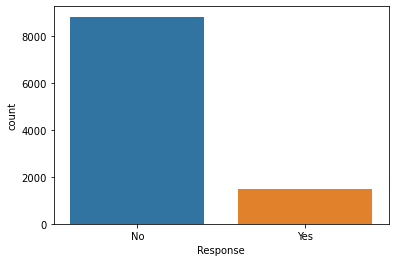

In [26]:
sns.countplot('Response', data = file)
plt.show()

Show a plot of the response rate by the sales channel

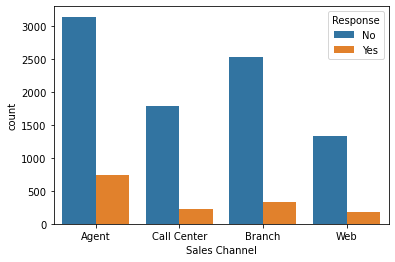

In [27]:
#this is a plot of the yes and no reponses across sales channels, but since each sales channel has different total numbers it cant be compared
ax = sns.countplot(x="Sales Channel", hue="Response", data=file)
#calculating the response rate is useful           

In [28]:
#to calculate response rate we need the number of YES/NO for each sales channel
table= file.groupby(['Sales Channel', 'Response']).size()
display(table)

Sales Channel  Response
Agent          No          3148
               Yes          742
Branch         No          2539
               Yes          326
Call Center    No          1792
               Yes          221
Web            No          1334
               Yes          177
dtype: int64

In [29]:
#divide each yes and no count by the total number of responses for that channel
rates = []
for i in range(1, len(table), 2):
    rates.append(table[i]/(table[i]+table[i-1]))
rates

[0.19074550128534704,
 0.1137870855148342,
 0.10978638847491307,
 0.1171409662475182]

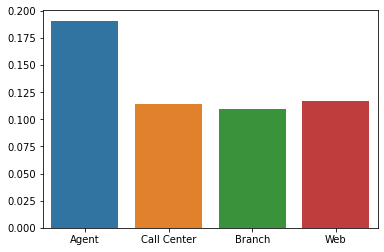

In [30]:
sns.barplot(x=file['Sales Channel'].unique(), y=rates)
plt.show()

Show a plot of the response rate by the total claim amount.

In [31]:
#split data into yes and no
YES=file[file['Response']=='Yes']
NO=file[file['Response']=='No']

In [32]:
#creat bins manually
claim_bins=np.linspace(0,3000,50)# 3000 because its the maximum of total claim amount shown in file.describe()

In [33]:
#generate histogram with np.histogram
YES_hist=np.histogram(YES['Total Claim Amount'],bins=claim_bins,range=(0,3000))
NO_hist=np.histogram(NO['Total Claim Amount'],bins=claim_bins,range=(0,3000))

In [34]:
#calculate reponse rate
hist_response_rate=YES_hist[0]/(YES_hist[0]+NO_hist[0])

<ipython-input-34-e740b2cf4642>:2: RuntimeWarning: invalid value encountered in true_divide
  hist_response_rate=YES_hist[0]/(YES_hist[0]+NO_hist[0])


Text(0, 0.5, 'Response Rate')

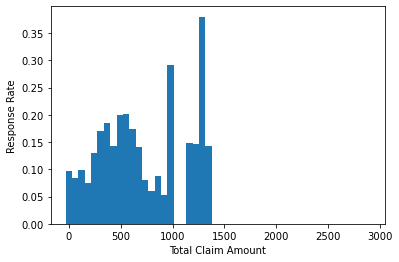

In [35]:
plt.bar(claim_bins[:-1],hist_response_rate,width=claim_bins[1]-claim_bins[0])
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')

Show a plot of the response rate by income.

In [36]:
#repeat the steps above for income

In [37]:
#creat bins manually
income_bins=np.linspace(0,100000,50)# 100000 because its the maximum of total claim amount shown in file.describe()

In [38]:
#generate histogram with np.histogram
YES_hist2=np.histogram(YES['Income'],bins=income_bins,range=(0,100000))
NO_hist2=np.histogram(NO['Income'],bins=income_bins,range=(0,100000))

In [39]:
hist_response_rate2=YES_hist2[0]/(YES_hist2[0]+NO_hist2[0])

<ipython-input-39-8a27f5f165d4>:1: RuntimeWarning: invalid value encountered in true_divide
  hist_response_rate2=YES_hist2[0]/(YES_hist2[0]+NO_hist2[0])


Text(0, 0.5, 'Response Rate')

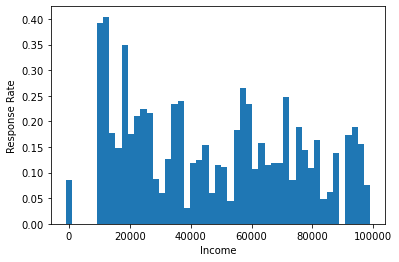

In [40]:
plt.bar(income_bins[:-1],hist_response_rate2,width=income_bins[1]-income_bins[0])
plt.xlabel('Income')
plt.ylabel('Response Rate')

# Lab Round 4

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 


In [41]:
numerical=file.select_dtypes(include=['float64','int64'])

In [42]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
0,4809.216960,48029,61,7.000000,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.0,2,484.013411,1
4,9025.067525,23675,117,15.149071,31,0.0,7,707.925645,1


In [43]:
categorical=file.select_dtypes(include=['object'])

In [44]:
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


Use seaborn library to construct distribution plots for the numerical variables

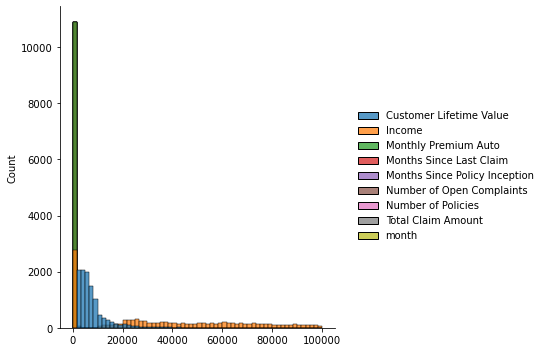

In [45]:
sns.displot(numerical, bins=60)
plt.show()

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

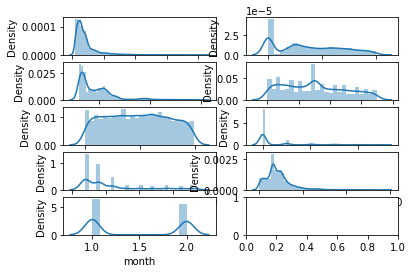

In [46]:
#found thios online but it looks all clustered together to much
n_rows=5
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(numerical.columns):
    sns.distplot(numerical[column],ax=axes[i//n_cols,i%n_cols])

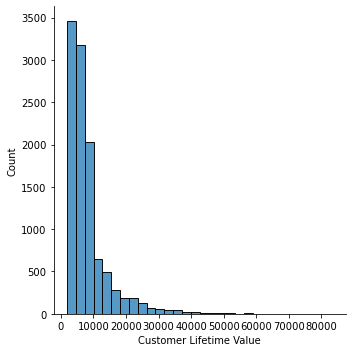

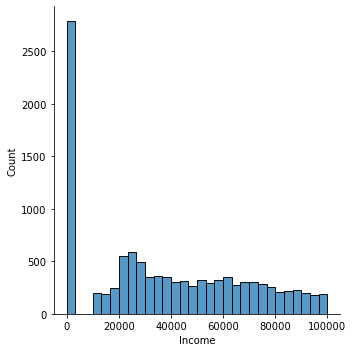

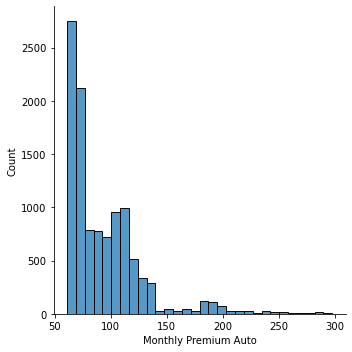

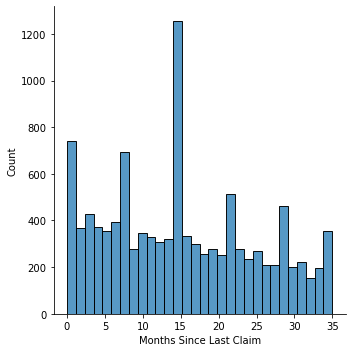

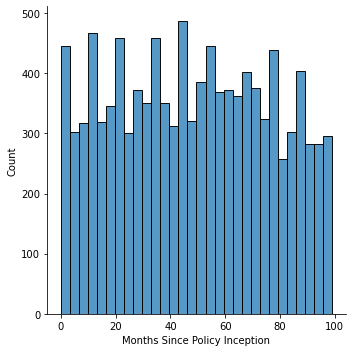

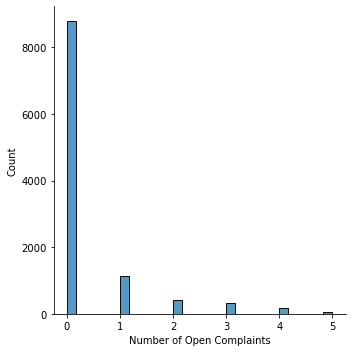

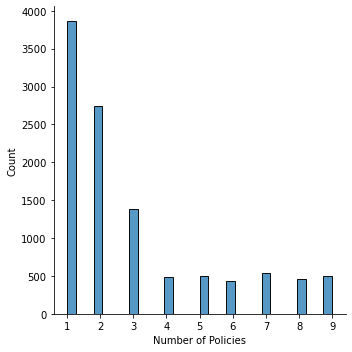

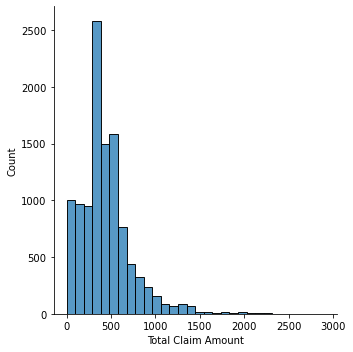

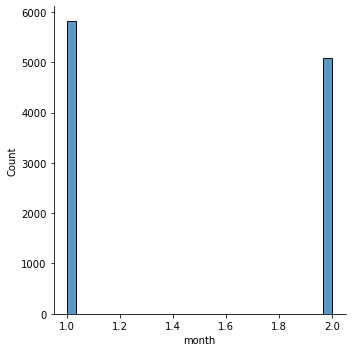

In [47]:
#this is easier to understand and better to look at
for i in numerical.columns:
    sns.displot(x=i, data= numerical, bins=30)
    plt.show()

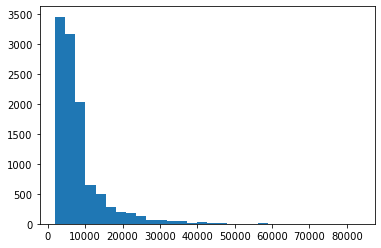

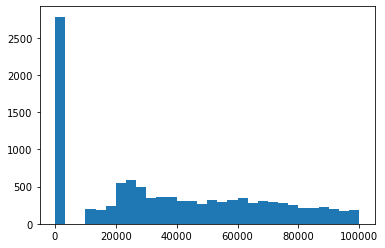

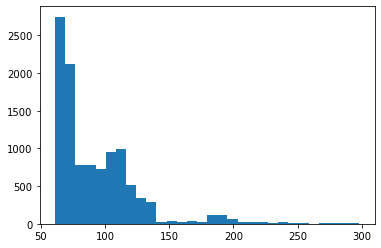

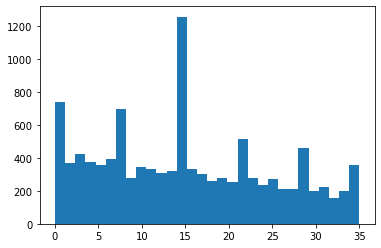

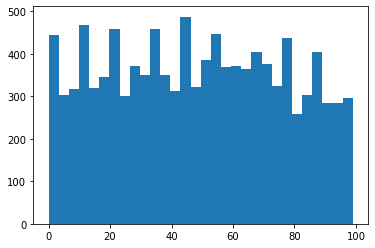

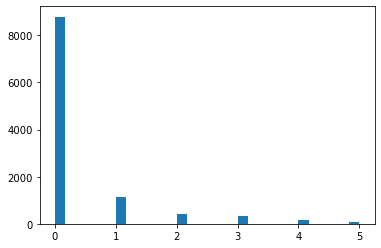

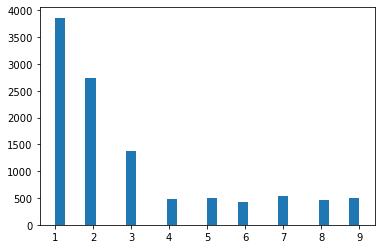

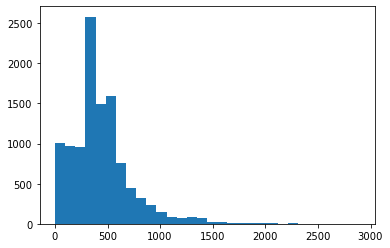

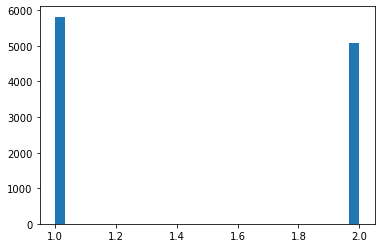

In [48]:
for i in numerical.columns:
    plt.hist(x=i, data= numerical, bins=30)
    plt.show()
  

none of them look like a nomral distribrution

multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

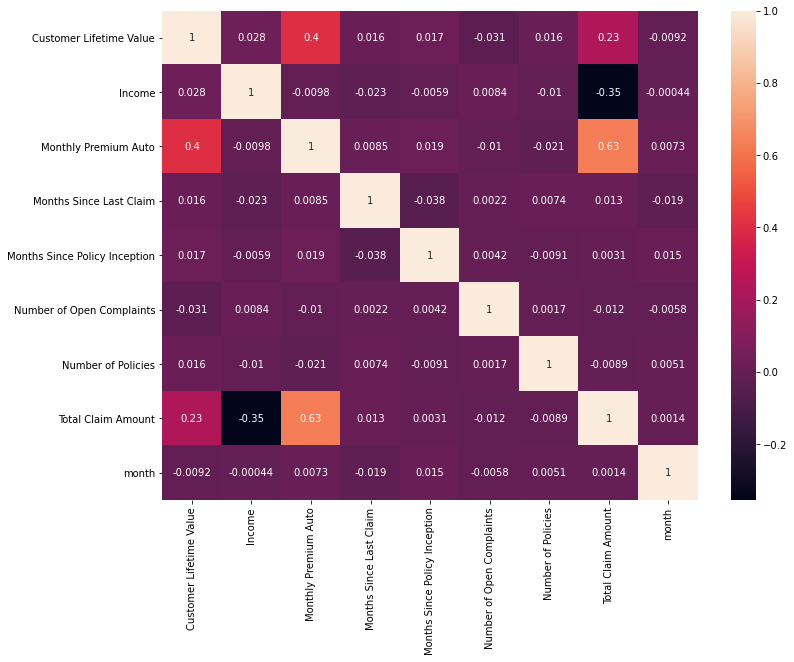

In [49]:
plt.figure(figsize=(12, 9))
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [50]:
correlations_matrix = numerical.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,month
Customer Lifetime Value,1.000000,0.028306,0.403069,0.015683,0.016960,-0.030616,0.016024,0.232626,-0.009234
Income,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.008425,-0.009960,-0.354141,-0.000443
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010059,-0.020505,0.631799,0.007253
Months Since Last Claim,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002235,0.007425,0.012728,-0.019359
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004165,-0.009123,0.003095,0.015163
Number of Open Complaints,-0.030616,0.008425,-0.010059,0.002235,0.004165,1.000000,0.001681,-0.012380,-0.005802
Number of Policies,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.001681,1.000000,-0.008923,0.005127
Total Claim Amount,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.012380,-0.008923,1.000000,0.001425
month,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.005802,0.005127,0.001425,1.000000


Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There is no pair of feature that has a correlation higher than 0.9, therefore I dont drop anything

# Round 5

X-y split

In [51]:
from sklearn.preprocessing import MinMaxScaler 

X_num=file.select_dtypes(include = np.number)

y= file['Total Claim Amount']
#X= file.drop(['Total Claim Amount'], axis=1)
X_num=X_num.drop(['Total Claim Amount'], axis=1)

In [52]:
X_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month
0,4809.216960,48029,61,7.000000,52,0.0,9,2
1,2228.525238,0,64,3.000000,26,0.0,1,1
2,14947.917300,22139,100,34.000000,31,0.0,2,2
3,22332.439460,49078,97,10.000000,3,0.0,2,1
4,9025.067525,23675,117,15.149071,31,0.0,7,1


Normalize

In [53]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
file2=pd.DataFrame(x_normalized, columns=X_num.columns)

(10910, 8)


In [54]:
file2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.0,0.750,0.0


# Round 6

#### clean categorical a bit 

In [55]:
#first we work with the categorical that we saved in lab 4 already
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [56]:
categorical['Policy Type'].unique() 


array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [57]:
categorical = categorical.drop(['Policy Type'], axis=1)
categorical = categorical.drop(['Effective To Date'], axis=1)# we dont need this date as well
categorical = categorical.drop(['Customer'], axis=1)# the customer ID doesnt help outmodel to predict anything
categorical.head()

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [58]:
categorical['Renew Offer Type'].unique()

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

##  One Hot Encoder

In [59]:
# I would apply the one hot encoder to the follwoing columns: State, Response, Employment Status, 
#gender, Location code, Marital status, Sales channel, 
#drop others
X_cat_hot=categorical.drop(['Coverage','Education','Policy','Renew Offer Type','Vehicle Class','Vehicle Size'], axis=1)#creat inpout for one hot encoder
X_cat_hot.head()

,State,Response,Employment Status,Gender,Location Code,Marital Status,Sales Channel
0,Arizona,No,Employed,M,Suburban,Married,Agent
1,California,No,Unemployed,F,Suburban,Single,Call Center
2,Washington,No,Employed,M,Suburban,Single,Call Center
3,Oregon,Yes,Employed,M,Suburban,Single,Branch
4,Oregon,No,Medical Leave,F,Suburban,Married,Branch


#### Thought about using get_dummies, but can produce errors. therefore not used anymore

In [60]:
#this get_dummies function is a bit dirty, because if we use a test set than get dummies produces a different order of columns since its always taking the ont state with the most occurnce first
#so if the test set is different from the train set its all out of order

In [61]:
#categorical_columns = ['State', 'Response', 'Employment Status','Gender','Location Code','Marital Status', 'Sales Channel']

#for column in categorical_columns: #loop over different categorical columns
    #tempdf = pd.get_dummies(X_cat_hot[column], prefix=column)#get_dummies is a easier version than looping over each column with one hot encoder
    #X_cat_hot_encoded = pd.merge( #merge it to previous dataframe
    #    left=X_cat_hot,
    #    right=tempdf,
    #    left_index=True,
    #    right_index=True,
    #)
    #df = X_cat_hot_encoded.drop(columns=column)
    #
#df = X_cat_hot_encoded.drop(categorical_columns,axis=1) #I need to drop the original data       


#found this site very helpful explenation
#https://datagy.io/pandas-get-dummies/

In [62]:
#df.head()

#### use one hot encoder instead

In [63]:
df2=X_cat_hot
#this version is gonna be the code we used in lesson 8

In [64]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(df2)
encoded_for_p = encoder.transform(df2).toarray()
encoded_for_p
encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded_for_p = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded_for_p = onehot_encoded_for_p.drop(cols_to_drop,axis=1)
onehot_encoded_for_p.head()

,California,Nevada,Oregon,Washington,NaN,Yes,NaN,Employed,Medical Leave,Retired,Unemployed,M,Suburban,Urban,Married,Single,Branch,Call Center,Web
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


##  Label encoder

In [65]:
# I would apply the label encoder to the follwoing columns: Coverage, Education, Vehicle Size, Policy, vehicle class, Renew offer type  
#drop the others
X_cat_label=categorical.drop(['State','Response','Employment Status','Gender','Location Code','Marital Status','Sales Channel'], axis=1)#creat inpout for one hot encoder
X_cat_label.head()

,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,Basic,College,Corporate L3,Offer3,Four-Door Car,Medsize
1,Basic,College,Personal L3,Offer4,Four-Door Car,Medsize
2,Basic,Bachelor,Personal L3,Offer3,SUV,Medsize
3,Extended,College,Corporate L3,Offer2,Four-Door Car,Medsize
4,Premium,Bachelor,Personal L2,Offer1,Four-Door Car,Medsize


In [66]:
#similar problem here how tu use the encoder across multiplecolumns in dataframe
#this webiste was helpful:
#https://www.kite.com/python/answers/how-to-encode-labels-for-multiple-columns-with-scikit-learn-in-python

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

df3=X_cat_label

encoder_dict = defaultdict(LabelEncoder)
labeled_df = df3.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [67]:
labeled_df.head()

,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,0,1,2,2,0,1
1,0,1,5,3,0,1
2,0,0,5,2,3,1
3,1,1,2,1,0,1
4,2,0,4,0,0,1


In [68]:
file2.head() #check again what numerical values I used

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.0,0.750,0.0


#### Concat DataFrames

In [69]:
#concat the transfered categorical data and the normalized numerical data
X_regression=pd.concat([file2,onehot_encoded_for_p,labeled_df], axis=1)
X_regression.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month,California,Nevada,Oregon,Washington,NaN,Yes,NaN,Employed,Medical Leave,Retired,Unemployed,M,Suburban,Urban,Married,Single,Branch,Call Center,Web,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,2,0,1
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,5,3,0,1
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,5,2,3,1
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,2,1,0,1
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.0,0.750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,4,0,0,1


## Linear regression

### Train-test split

In [70]:
y.head()# check our target data from previous excerccises

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: Total Claim Amount, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
#first try to train model on 80% of data and than test on 20% of data
X_train, X_test, y_train, y_test = train_test_split(X_regression, y, test_size=0.2, random_state=42)

In [72]:
#check if data was split in train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 33)
(2182, 33)
(8728,)
(2182,)


In [73]:
X_train.head()# we can see randmly choosen rows for the train data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,month,California,Nevada,Oregon,Washington,NaN,Yes,NaN,Employed,Medical Leave,Retired,Unemployed,M,Suburban,Urban,Married,Single,Branch,Call Center,Web,Coverage,Education,Policy,Renew Offer Type,Vehicle Class,Vehicle Size
3105,0.033983,0.000000,0.004219,0.742857,0.626263,0.0,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,4,0,5,2
6032,0.103048,0.963553,0.278481,0.542857,0.121212,0.0,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,4,2,3,1
157,0.036541,0.188696,0.274262,0.114286,0.626263,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,3,4,2,3,1
6964,0.061978,0.000000,0.029536,0.685714,0.313131,0.0,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,3,3,0,0,1
6349,0.007055,0.638721,0.004219,0.742857,0.818182,0.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1,5,1,0,1


### Apply linear regression

In [74]:
#train the model
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model validation

#### R2 score

In [78]:

#prediction of the train data is obviously high
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.7685582476962239

In [84]:
#now evaluate model on test data
predictions_test= lm.predict(X_test)
r2_score(y_test, predictions_test)
#seems to work quite well on test data with a similar value to the train data

0.7675834812874378

#### Mean squared error (MSE)

In [87]:
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,predictions_test))
print(mse)

136.98905481218924


#### Root mean squared error (RMSE)

In [90]:
import math
rmse = math.sqrt(mse)
print(rmse)

11.704232346129722


#### Mean absolute error (MAR)

In [89]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

95.76403700749098


## Improving linear regression

##### train the model on 95 % of the data and take 5% test data

In [92]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_regression, y, test_size=0.05, random_state=42)

lm2 = linear_model.LinearRegression()
lm2.fit(X_train2,y_train2)

LinearRegression()

In [93]:
predictions_test2= lm2.predict(X_test2)
r2_score(y_test2, predictions_test2)
# r2 value is bascially similar

0.7631006000980435

In [94]:
mse2=np.sqrt(mean_squared_error(y_test2,predictions_test2))
print(mse2)

rmse2 = math.sqrt(mse2)
print(rmse2)

mae2 = mean_absolute_error(y_test2, predictions_test2)
print(mae2)
#errors are similar, only very slightly reduced

132.38616568228196
11.50591872395603
93.26822671525146


##### train the model on 50% of the data and take 50% test data

In [101]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_regression, y, test_size=0.5, random_state=42)

lm3 = linear_model.LinearRegression()
lm3.fit(X_train3,y_train3)

LinearRegression()

In [102]:
predictions_test3= lm3.predict(X_test3)
r2_score(y_test3, predictions_test3)
# r2 value is improved slightly

0.771167782332324

In [103]:
mse3=np.sqrt(mean_squared_error(y_test3,predictions_test3))
print(mse2)

rmse3 = math.sqrt(mse3)
print(rmse3)

mae3 = mean_absolute_error(y_test3, predictions_test3)
print(mae3)
#errors are similar, only very slightly reduced

132.38616568228196
11.796240702772497
96.54361958871873


In [ ]:
#are more improved version of the model is in the final round where some numerical and ctegaorical parameters are left out for modeling